In [5]:
from google.colab import drive
drive.mount('/content/drive/')

# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

df = pd.read_csv("/content/drive/MyDrive/Data Set/1729258-1613615-Stock_Price_data_set__1_.csv")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Epoch 1/100
12/12 [==============================] - 9s 263ms/step - loss: 0.0507 - val_loss: 0.0456
Epoch 2/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0085 - val_loss: 0.0177
Epoch 3/100
12/12 [==============================] - 2s 148ms/step - loss: 0.0057 - val_loss: 0.0150
Epoch 4/100
12/12 [==============================] - 2s 210ms/step - loss: 0.0035 - val_loss: 0.0144
Epoch 5/100
12/12 [==============================] - 3s 216ms/step - loss: 0.0037 - val_loss: 0.0141
Epoch 6/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0031 - val_loss: 0.0176
Epoch 7/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0028 - val_loss: 0.0133
Epoch 8/100
12/12 [==============================] - 2s 149ms/step - loss: 0.0027 - val_loss: 0.0121
Epoch 9/100
12/12 [==============================] - 2s 150ms/step - loss: 0.0029 - val_loss: 0.0124
Epoch 10/100
12/12 [==============================] - 2s 152ms/step - loss: 0.0026 - val_lo

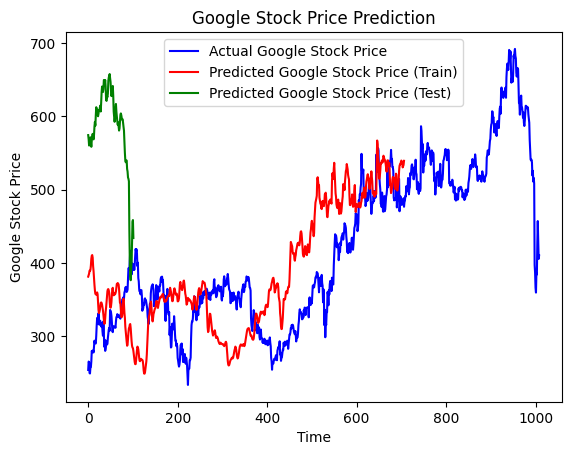

In [6]:
# Preprocess the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))

# Create training and testing datasets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Predict stock prices
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform to get actual stock prices
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Plot the results
plt.plot(df['Close'].values, color='blue', label='Actual Google Stock Price')
plt.plot(train_predict, color='red', label='Predicted Google Stock Price (Train)')
plt.plot(test_predict, color='green', label='Predicted Google Stock Price (Test)')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
